## If a cell begins with DNC: do not change it and leave the markdown there so I can expect a basic level of  organization that is common to all HW (will help me with grading). This also clearly delineates the sections for me

## DNC: preamble leave any general comments here and, in keeping with good practice, I suggest you load all needed modules in the preamble

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
%matplotlib inline

## DNC: Begin Part 1: Descriptive Statistics 

### Part 1: Problems for descriptive statistics 

#### 1-1: Understanding statistical calculations in python 

* Create a numpy array that has 10 uniform random numbers between 25.0 and 35.0, store it as a variable 
* Createa pandas dataframe with one frame based on your numpy array 
* Use "np.std" and "pd.std" formulas to calculate the standard deviation from both arrays, do not change any of the default arguments 
* The numbers should be different, explain why 
* Repeat the exercise with 1E6 uniform random numbers drawn from the same range 
* Comment on whether the numbers are different or not and explain why 
* Demonstrate that by using the proper function arguments you can obtain the same answer in both methods 


#### 1-2: Box plots 

* The data file GerberdingElectricityChilledWater.csv shows chilled water (energy) and electricity usage for Gerberding Hall over approximately an 18 month period from Jan 2013 to June 2014.  
* **Note: these are real data! If you make any executive decisions (e.g., remove some points for very specific reasons), clearly explain your decision and motivation for doing so** 

* Load the data into Python (your choice of method) and prepare a box plot summary of the data. 
* Present the plot in the nicest possible format (e.g., improve it from the default and prepare it for publication or presentation format) - this is open ended and you can use your judgement 
* Explain in your own words what each part on the box plot means

#### Part 1-1

In [2]:
unirand = np.random.uniform(low = 25.0, high = 35.0, size = 10)
print(unirand)
unidataframe = pd.DataFrame(unirand)
print(unidataframe)
print('\nnp.std = %f; pd.std = %f' %(np.std(unidataframe), unidataframe.std()))
print('By default, degree of freedoms of np.std and pd.std are 0 and 1 respectively.')
unirand = np.random.uniform(low = 25.0, high = 35.0, size = 1000000)
unidataframe = pd.DataFrame(unirand)
print('1E6 random numbers:\nnp.std = %f; pd.std = %f' %(np.std(unidataframe), unidataframe.std()))
print('The valuses are very close, because when n is large enough(infinity), the distribution of the sample(dof=1) will be same as population(dof=0).')
print('We can get same results by using ddof.\ndof = 0:\nnp.std = %f; pd.std(ddof=0) = %f\ndof = 1:\nnp.std(ddof=1) = %f; pd.std = %f' %(np.std(unidataframe), unidataframe.std(ddof = 0),np.std(unidataframe, ddof = 1), unidataframe.std()))

[ 32.55532391  31.18261423  34.46651995  31.43369901  26.77273628
  27.72206905  34.5143894   29.84776857  31.72384596  33.31018841]
           0
0  32.555324
1  31.182614
2  34.466520
3  31.433699
4  26.772736
5  27.722069
6  34.514389
7  29.847769
8  31.723846
9  33.310188

np.std = 2.481246; pd.std = 2.615463
By default, degree of freedoms of np.std and pd.std are 0 and 1 respectively.
1E6 random numbers:
np.std = 2.886107; pd.std = 2.886108
The valuses are very close, because when n is large enough(infinity), the distribution of the sample(dof=1) will be same as population(dof=0).
We can get same results by using ddof.
dof = 0:
np.std = 2.886107; pd.std(ddof=0) = 2.886107
dof = 1:
np.std(ddof=1) = 2.886108; pd.std = 2.886108


#### Part 1-2

In [3]:
data = pd.read_csv('GerberdingElectricityChilledWater.csv')
print(data.head())

      DateTime      Btu    kWh
0  1/1/13 0:15  49664.0  19.69
1  1/1/13 0:30  90112.0  20.84
2  1/1/13 0:45  19968.0  17.42
3  1/1/13 1:00  50176.0  19.59
4  1/1/13 1:15  99840.0  20.46


                Btu           kWh
count  4.999800e+04  49998.000000
mean   6.142801e+04     18.673828
std    3.378179e+04     14.736762
min    0.000000e+00    -71.682969
25%    3.993600e+04     15.900000
50%    5.017600e+04     18.080000
75%    7.987200e+04     26.117500
max    2.070016e+06     51.010000


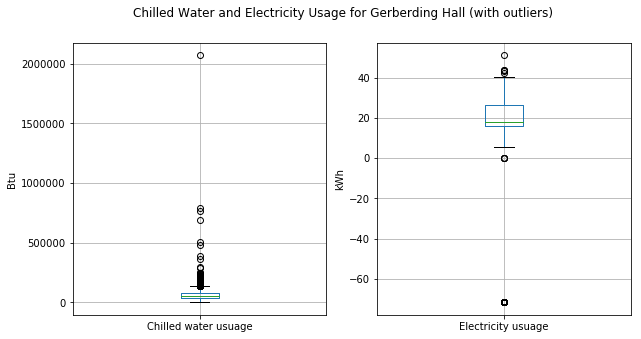

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(121)
data.boxplot(['Btu'])
plt.xticks([1], ['Chilled water usuage'])
plt.ylabel('Btu')
plt.subplot(122)
data.boxplot(['kWh'])
plt.xticks([1],['Electricity usuage'])
plt.ylabel('kWh')

plt.suptitle('Chilled Water and Electricity Usage for Gerberding Hall (with outliers)')

print(data.describe())

As shown in above, the line(green one) in the box is the median(Q2, 50th percentile, the value separating the higher half from the lower half) of data. The lower boundary of the box is first quartile(Q1, 25th percentile), which is defined as the middle number between the smallest number and the median of the data. The upper boundary of the box is third quartile(Q3, 75th percentile), which is the middle value between the median and the highest value of the data. The interquartile range(IQR) is Q3 - Q1. The upper line outside the box is Q3 + 1.5 x IQR, and the lower line is Q1 - 1.5 x IQR. Data can be viewed as outliers outside these two lines. There is also a definition that the range [Q3+1.5 x IQR, Q3+3 x IQR] and [Q1-3 x IQR, Q1-1.5 x IQR] are called mild outiliers, and outside the 3 x IQR are called extreme outliers. I calculate these values below.

In [5]:
IQR = data.quantile(q = 0.75) - data.quantile(q = 0.25)
upermild = data.quantile(q = 0.75) + 1.5*IQR
uperextre = data.quantile(q = 0.75) + 3*IQR
lowermild = data.quantile(q = 0.25) - 1.5*IQR
lowerextre = data.quantile(q = 0.25) - 3*IQR
print(lowerextre)
print(lowermild)
print(upermild)
print(uperextre)

Btu   -79872.0000
kWh      -14.7525
dtype: float64
Btu   -19968.00000
kWh        0.57375
dtype: float64
Btu    139776.00000
kWh        41.44375
dtype: float64
Btu    199680.00
kWh        56.77
dtype: float64


##### The data fall in extreme outliers are most probably wrong data (or mostly not common one). Furthermore, data in this case can't be negative. Thus, I rearrange data by eliminating those values.

In [6]:
for index, row in data.iterrows():
    if row['Btu'] > uperextre[0]:
        data.drop(index,inplace = True)
    elif row['kWh'] > uperextre[1]:
        data.drop(index,inplace = True)
    elif row['kWh'] < 0:
        data.drop(index,inplace = True)

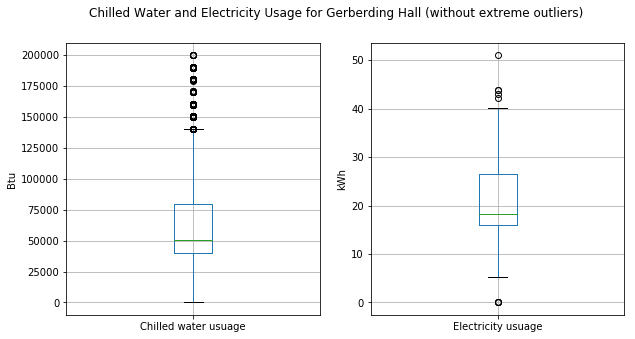

In [7]:
#plot again
plt.figure(figsize=(10,5))
plt.subplot(121)
data.boxplot(['Btu'])
plt.xticks([1], ['Chilled water usuage'])
plt.ylabel('Btu')
plt.subplot(122)
data.boxplot(['kWh'])
plt.xticks([1],['Electricity usuage'])
plt.ylabel('kWh')

plt.suptitle('Chilled Water and Electricity Usage for Gerberding Hall (without extreme outliers)')

Also, I can plot without showing any outliers, shown below.

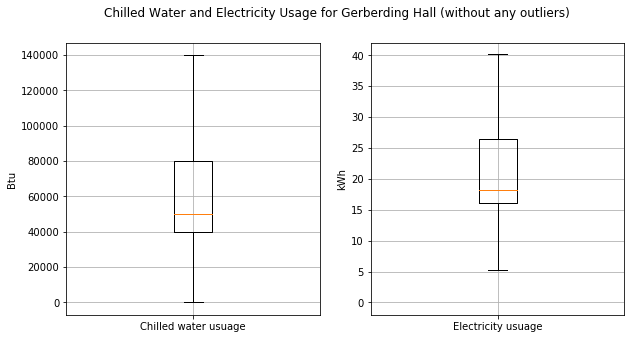

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.boxplot(data.Btu,showfliers = False)
plt.xticks([1], ['Chilled water usuage'])
plt.ylabel('Btu')
plt.grid()
plt.subplot(122)
plt.boxplot(data.kWh,showfliers = False)
plt.xticks([1],['Electricity usuage'])
plt.ylabel('kWh')
plt.ylim([-2,42])
plt.grid()

plt.suptitle('Chilled Water and Electricity Usage for Gerberding Hall (without any outliers)')

## DNC: Begin Part 2

### Part 2: Distributions 

* Your goal is to prepare a side-by-side plot describing the distribution of data from part 1 related to Gerberding Hall.

1) To complete the plot you should assume the data are normally distributed and determine the mean and standard deviation of the chilled water data series.  

2) The left panel of the plot should be a normalized histogram of the chilled water data with an **overlay** of the PDF of the normal distribution based on the $\bar x$ and $s$ values from the data series.  The right panel of the plot should be contain two lines corresponding to the measured CDF and CDF from the normal distribution estimated from the data. 

3) Repeat (2) for the electricity water 

4) Comment in a Markdown cell on the ability of a normal distribution to describe this data 


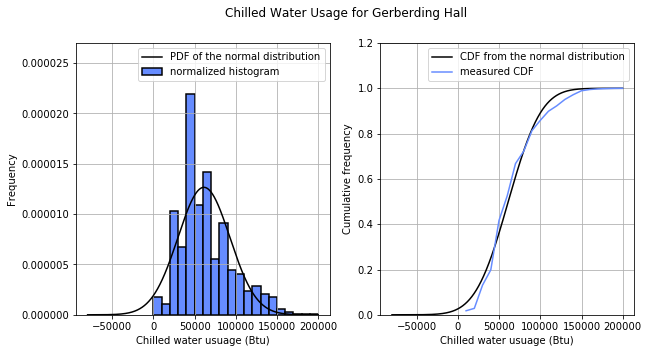

In [9]:
from scipy.stats import norm
#left
x=np.arange(lowerextre[0],uperextre[0])
y = norm.pdf(x,data['Btu'].mean(),data['Btu'].std())
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(x, y, label = 'PDF of the normal distribution', linewidth = 1.5,color = 'k')
plt.hist(data['Btu'], bins = 20, normed = True, label = 'normalized histogram', color = '#668cff',edgecolor='k', lw=1.5)
plt.ylim([0,0.000027])
plt.grid()
plt.legend()
plt.xlabel('Chilled water usuage (Btu)')
plt.ylabel('Frequency')

#right
y = norm.cdf(x,data['Btu'].mean(),data['Btu'].std())
counts, bin_edges = np.histogram(data['Btu'], bins= 20, density=True)
cdf = np.cumsum(counts * np.diff(bin_edges))

plt.subplot(122)
plt.plot(x, y, label = 'CDF from the normal distribution',color = 'k')
plt.plot(bin_edges[1:], cdf, label = 'measured CDF',color = '#668cff')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('Chilled water usuage (Btu)')
plt.ylim([0,1.2])
plt.ylabel('Cumulative frequency')

plt.suptitle('Chilled Water Usage for Gerberding Hall')

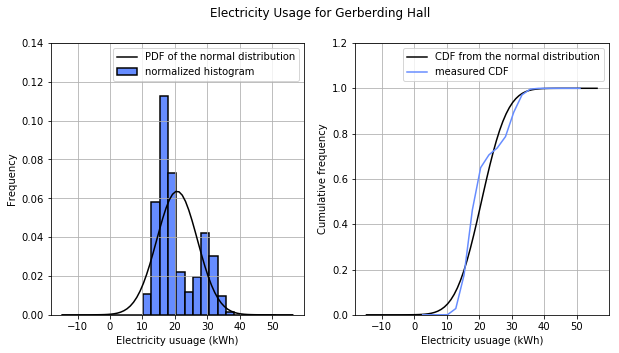

In [10]:
#left 
x=np.arange(lowerextre[1],uperextre[1])
y = norm.pdf(x,data['kWh'].mean(),data['kWh'].std())
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(x, y, label = 'PDF of the normal distribution', linewidth = 1.5,color = 'k')
plt.hist(data['kWh'], bins = 20, normed = True, label = 'normalized histogram', color = '#668cff',edgecolor='k', lw=1.5)
plt.ylim([0,0.14])
plt.grid()
plt.legend()
plt.xlabel('Electricity usuage (kWh)')
plt.ylabel('Frequency')
#right
y = norm.cdf(x,data['kWh'].mean(),data['kWh'].std())
counts, bin_edges = np.histogram(data['kWh'], bins= 20, density=True)
cdf = np.cumsum(counts * np.diff(bin_edges))

plt.subplot(122)
plt.plot(x, y, label = 'CDF from the normal distribution',color = 'k')
plt.plot(bin_edges[1:], cdf, label = 'measured CDF',color = '#668cff')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('Electricity usuage (kWh)')
plt.ylim([0,1.2])
plt.ylabel('Cumulative frequency')

plt.suptitle('Electricity Usage for Gerberding Hall')

#### Comment:
* Chilled water usuage is closer to normal distribution than electricity usuage is. And we can see that the CDF from the normal distribution is a good approxmation to the measured CDF, so I think it has a good ability to describe chilled water usuage. In contrast, in electricity usuage, both plots show that PDF and CDF from normal distribution don't fit the measured data very well. 

## DNC: Begin Part 3

### Part 3: Hypothesis testing 

The file energyuse.csv contains energy use data for 6 UW students. The data include electricity for lighting, all other electricity use and total electricity use. The final entry in the data file is the national average of the same values. 

Please do the following

1) Formulate a statistical hypothesis to test about the three data sets and clearly state it  
2) Perform a test a significance level of P=0.05 (_make sure to clearly comment your work so I can follow what you are doing_)  
3) Clearly state the meaning of the results in plain language 

In [11]:
eusedata = pd.read_csv('energyuse.csv')
eusedata

,Group,Lighting,Electricity,Total
0,A,0.451,1.270,1.721
1,B,1.033,1.769,2.801
2,C,0.410,1.629,2.040
3,D,0.708,1.633,2.341
4,E,2.317,0.725,3.042
5,F,1.601,0.634,2.235
6,National Avg,1.760,1.280,3.040


#### Statement
* Null hypothesis(H0): The average total usuage for 6 UW students is equal to the national Avg = 3.040.
* Alternative hypothesis(Ha): The average total usuage for 6 UW students is **not** equal to the national Avg = 3.040.

In [12]:
from scipy import stats
#Calculate statistic value.
mean = eusedata['Total'][0:6].mean()
std = eusedata['Total'][0:6].std(ddof = 1)
N = np.shape(eusedata)[0]-1
sem = stats.sem(eusedata['Total'][0:6],ddof=1)
t = (mean - 3.040)/ sem
p = stats.t.sf(np.abs(t),N-1)*2
print('mean = %.4f, std = %.4f, sem = %.4f, t = %.4f, p = %.4f' %(mean, std, sem, t, p))

mean = 2.3633, std = 0.4871, sem = 0.1989, t = -3.4029, p = 0.0192


In [13]:
#Confirm t and p
[tcalc,p]=stats.ttest_1samp(eusedata['Total'][0:6],3.040)
tcalc,p

(-3.4028918925369513, 0.019190717969454891)

#### Explanation
* In statistics, the p-value represents the probablity of extreme value by assuming H0 is true. When p-value is smaller enough(under desired significance level, $\alpha$), extreme value has very low probablity, but it still exists. Thus, we have confidence to reject the assumption H0 is true. That is, we can state that Ha is true. In contrast, when p-value is larger than $\alpha$, we can only state that we don't have enough evidence to reject H0. 
* In this case, p-value is 0.0192, which is smaller than $\alpha$ = 0.05, so we reject H0 and state that Ha is true. That is, the average total usuage for 6 UW students is not equal to the national Avg = 3.040 in this case.
* I try to plot the p-value concept(based on my understanding) below. We can see that the average total usuage for 6 UW students falls into the rejection area, so we reject H0.

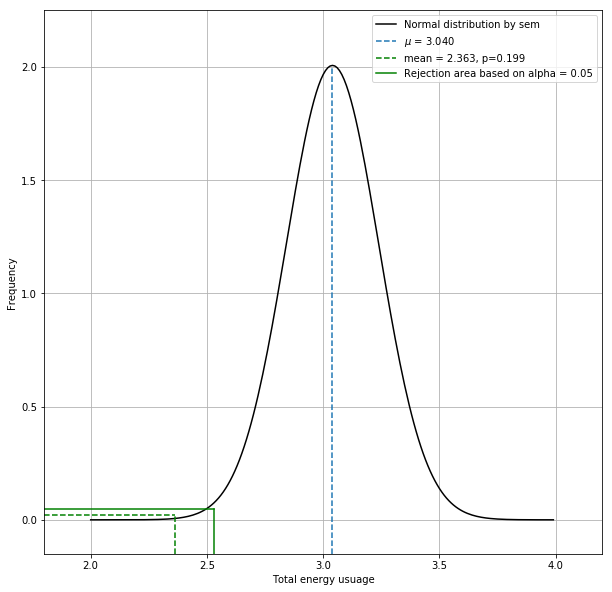

In [14]:
x=np.arange(2.0,4.0,0.01)
#Normal distribution based on mu and sem
y = norm.pdf(x,3.040,sem)
plt.figure(figsize=(10,10))
plt.subplot(111)
plt.plot(x, y, label = 'Normal distribution by sem', linewidth = 1.5,color = 'k')
plt.xlabel('Total energy usuage')
plt.ylabel('Frequency')
plt.ylim([-0.15,2.25])
plt.xlim([1.8,4.2])

#tag mu
x = np.full(2,3.040)
plt.plot(x,[-0.15,2.0],'--',label = '$\mu$ = 3.040')

#tag mean
x = np.full(2,mean)
plt.plot(x,[-0.15, p],'--',label = 'mean = 2.363, p=0.199', color = 'g')
y = np.full(2,p)
plt.plot([1.8,mean],y,'--',color = 'g')

#tag alpha
[L,U]=stats.t.interval(.95,N-1,loc=3.040, scale=sem)
x = np.full(2,L)
plt.plot(x,[-0.15, 0.05],label = 'Rejection area based on alpha = 0.05', color = 'g')
y = np.full(2,0.05)
plt.plot([1.8,L],y,color = 'g')

plt.grid()
plt.legend(loc='upper right')